# Exploring and preparing the data

## 1. BICIMAD. Details of the electric bicycle routes

### 1.1. Data presentation

#### 1.1.1. Movements of bycicles

**__id**: identificator of the movement

**user_day_code**: user code. For a same date, all the movement of the sale user have the same code.

**idunplug_station**: number of the origin station

**idunplug_base**: number of origin base

**idplug_station**: number of destination station

**idplug_base**: number of destionation base

**unplug_hourTime**: time the bicycle is picked up

**travel_time**: time in seconds of the ride

**track**: detail of the ride (GeoJSON)

**user_type**: type of user: 

    - 0: not defined
    - 1: anual user
    - 2: ocasional user
    - 3: worker of bicimad
    
**ageRange**: age range of the user:

    - 0: not defined
    - 1: between 0 and 16 years
    - 2: between 17 and 18 years
    - 3: between 19 and 26 years
    - 4: between 27 and 40 years
    - 5: between 41 and 65 years
    - 6: more than 65 years
    
**zip_code**: postal code of the user

### 1.2. Exploratory analysis

In [1]:
#libraries
import numpy as np
import pandas as pd
import json 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movements = pd.read_json('202106_movements.json', lines=True)

In [3]:
#We are interested in predicting the demand, so we remove from the dataframe the movement of the workers of bicimad
movements = movements[movements['user_type'] != 3]

In [4]:
movements.describe()

,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station
count,398202.000000,398202.000000,398202.000000,398202.000000,398202.000000,398202.000000,398202.000000
mean,12.390405,1.065806,12.366912,982.341385,122.501246,1.890149,122.676443
std,7.583481,0.552401,7.564848,1200.904093,74.395866,2.204513,74.722488
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,5.000000,1.000000,5.000000,499.000000,56.000000,0.000000,56.000000
50%,12.000000,1.000000,12.000000,745.000000,121.000000,0.000000,121.000000
75%,19.000000,1.000000,19.000000,1089.000000,184.000000,4.000000,185.000000
max,30.000000,7.000000,30.000000,21593.000000,270.000000,6.000000,2009.000000


In [5]:
movements.columns

Index(['_id', 'user_day_code', 'idplug_base', 'user_type', 'idunplug_base',
       'travel_time', 'idunplug_station', 'ageRange', 'idplug_station',
       'unplug_hourTime', 'zip_code'],
      dtype='object')

In [6]:
#!pip install iso8601
import iso8601
import datetime
import calendar

In [73]:
movements['datetime'] = pd.to_datetime(movements['unplug_hourTime'])
movements['date'] = movements['datetime'].dt.date
movements['weekday'] = movements['datetime'].dt.day_name()
movements['hour'] = movements['datetime'].dt.hour
movements['month'] = movements['datetime'].dt.month

<ipython-input-73-db2b68625273>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movements['datetime'] = pd.to_datetime(movements['unplug_hourTime'])
<ipython-input-73-db2b68625273>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movements['date'] = movements['datetime'].dt.date
<ipython-input-73-db2b68625273>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [74]:
movements

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code,datetime,date,weekday,hour,month
0,{'$oid': '60bbf3f21b91311d90d568ad'},b67ea824acf706087d5818ebc6f90821a5abaab17a0868...,15,1,13,5.316667,38,0,54,2021-06-01T00:00:00Z,,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0,6
1,{'$oid': '60bbf3f21b91311d90d568b2'},364b1b99f1f9a1748f7abf1134c8d6a46197b583649308...,7,1,1,6.433333,185,0,126,2021-06-01T00:00:00Z,,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0,6
2,{'$oid': '60bbf3f21b91311d90d568b3'},5cc17031cba02835dda4b6c153b56572beaade54d8ab91...,14,1,10,7.750000,15,0,91,2021-06-01T00:00:00Z,,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0,6
3,{'$oid': '60bbf3f21b91311d90d568b4'},6e855acaaa17d6d14236598c0f1172c783e16950e39c01...,8,1,22,10.216667,84,0,236,2021-06-01T00:00:00Z,,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0,6
4,{'$oid': '60bbf3f21b91311d90d568b5'},e93417502d55208995a61f4177956ab9289aba39044ce3...,1,1,4,12.516667,131,5,94,2021-06-01T00:00:00Z,28006,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413359,{'$oid': '60e3812c1b9131285030f696'},36d40b49fafe4e7f41919089b609debf52f1ee42f3e752...,14,1,20,14.016667,132,5,265,2021-06-30T23:00:00Z,28020,2021-06-30 23:00:00+00:00,2021-06-30,Wednesday,23,6
413360,{'$oid': '60e381341b9131285030fefb'},04ea09adba4c3e5e9e9142362b0fca2187530f31834001...,23,1,9,24.666667,182,5,265,2021-06-30T21:00:00Z,28005,2021-06-30 21:00:00+00:00,2021-06-30,Wednesday,21,6
413361,{'$oid': '60e381351b9131285030ff15'},d26c47762f73fbdca3fefb34830f72f2df1538f9926c73...,22,1,3,12.700000,15,5,265,2021-06-29T18:00:00Z,28791,2021-06-29 18:00:00+00:00,2021-06-29,Tuesday,18,6
413365,{'$oid': '60e4d2a51b91313ed4f52e62'},45de608bddfda3f468ef6093c65f6246a2917ce2376e98...,23,1,3,12.433333,234,0,84,2021-06-27T19:00:00Z,,2021-06-27 19:00:00+00:00,2021-06-27,Sunday,19,6


In [11]:
df_movements = movements.groupby(['date', 'weekday', 'hour'])._id.count().reset_index()

In [12]:
df_movements

,date,weekday,hour,_id
0,2021-06-01,Tuesday,0,31
1,2021-06-01,Tuesday,1,7
2,2021-06-01,Tuesday,2,9
3,2021-06-01,Tuesday,3,38
4,2021-06-01,Tuesday,4,54
...,...,...,...,...
715,2021-06-30,Wednesday,19,816
716,2021-06-30,Wednesday,20,555
717,2021-06-30,Wednesday,21,573
718,2021-06-30,Wednesday,22,505


##### Plot the evolution of total demand in the month of june

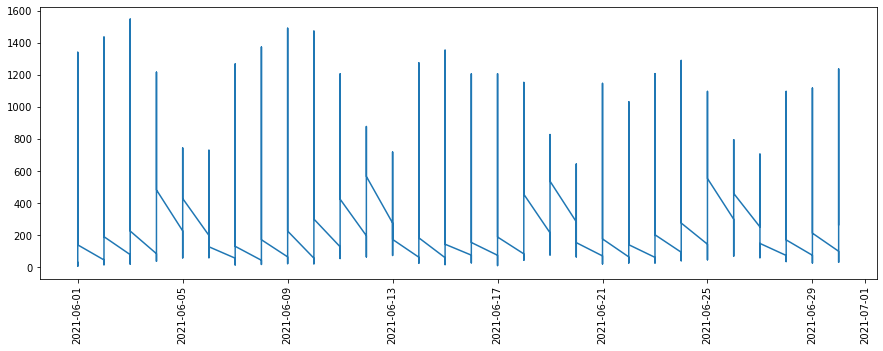

In [13]:
plt.figure(figsize=(15,5))

plt.plot(df_movements['date'], df_movements['_id'])
plt.xticks(rotation=90);

In [12]:
#From the plot we can see that the demands follows a pattern, that depends on the day of the week

##### Plots to understand the movements by day of week

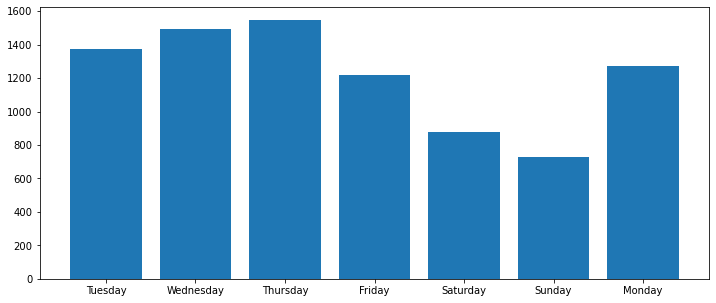

In [14]:
plt.figure(figsize=(12,5))
plt.bar(df_movements['weekday'], height = df_movements['_id']);

In [15]:
#From the plot we observate that the demand is higher in the laboral days, while in the weekend the demand is lower

##### Plots to understand the movements by hour

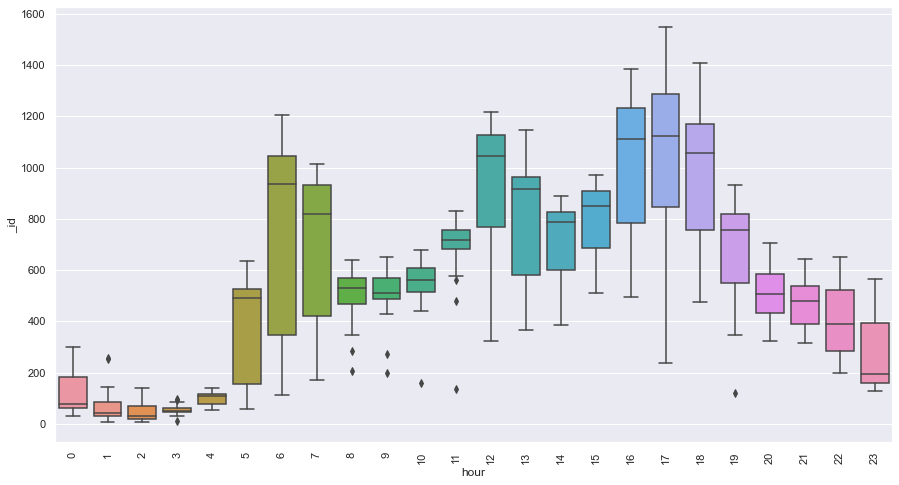

In [16]:
sns.set(rc = {'figure.figsize': (15,8)})
ax = sns.boxplot(x='hour', y = '_id', data = df_movements);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

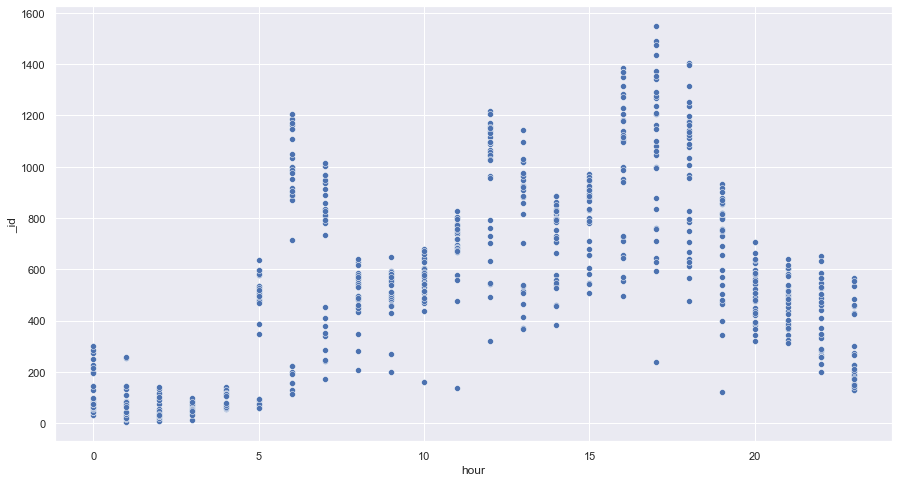

In [17]:
sns.scatterplot(data = df_movements, x=df_movements['hour'], y = df_movements['_id']);

#### Analyzing the travel time

In [18]:
movements

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code,datetime,date,weekday,hour
0,{'$oid': '60bbf3f21b91311d90d568ad'},b67ea824acf706087d5818ebc6f90821a5abaab17a0868...,15,1,13,319,38,0,54,2021-06-01T00:00:00Z,,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0
1,{'$oid': '60bbf3f21b91311d90d568b2'},364b1b99f1f9a1748f7abf1134c8d6a46197b583649308...,7,1,1,386,185,0,126,2021-06-01T00:00:00Z,,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0
2,{'$oid': '60bbf3f21b91311d90d568b3'},5cc17031cba02835dda4b6c153b56572beaade54d8ab91...,14,1,10,465,15,0,91,2021-06-01T00:00:00Z,,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0
3,{'$oid': '60bbf3f21b91311d90d568b4'},6e855acaaa17d6d14236598c0f1172c783e16950e39c01...,8,1,22,613,84,0,236,2021-06-01T00:00:00Z,,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0
4,{'$oid': '60bbf3f21b91311d90d568b5'},e93417502d55208995a61f4177956ab9289aba39044ce3...,1,1,4,751,131,5,94,2021-06-01T00:00:00Z,28006,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413359,{'$oid': '60e3812c1b9131285030f696'},36d40b49fafe4e7f41919089b609debf52f1ee42f3e752...,14,1,20,841,132,5,265,2021-06-30T23:00:00Z,28020,2021-06-30 23:00:00+00:00,2021-06-30,Wednesday,23
413360,{'$oid': '60e381341b9131285030fefb'},04ea09adba4c3e5e9e9142362b0fca2187530f31834001...,23,1,9,1480,182,5,265,2021-06-30T21:00:00Z,28005,2021-06-30 21:00:00+00:00,2021-06-30,Wednesday,21
413361,{'$oid': '60e381351b9131285030ff15'},d26c47762f73fbdca3fefb34830f72f2df1538f9926c73...,22,1,3,762,15,5,265,2021-06-29T18:00:00Z,28791,2021-06-29 18:00:00+00:00,2021-06-29,Tuesday,18
413365,{'$oid': '60e4d2a51b91313ed4f52e62'},45de608bddfda3f468ef6093c65f6246a2917ce2376e98...,23,1,3,746,234,0,84,2021-06-27T19:00:00Z,,2021-06-27 19:00:00+00:00,2021-06-27,Sunday,19


<AxesSubplot:xlabel='weekday', ylabel='travel_time'>

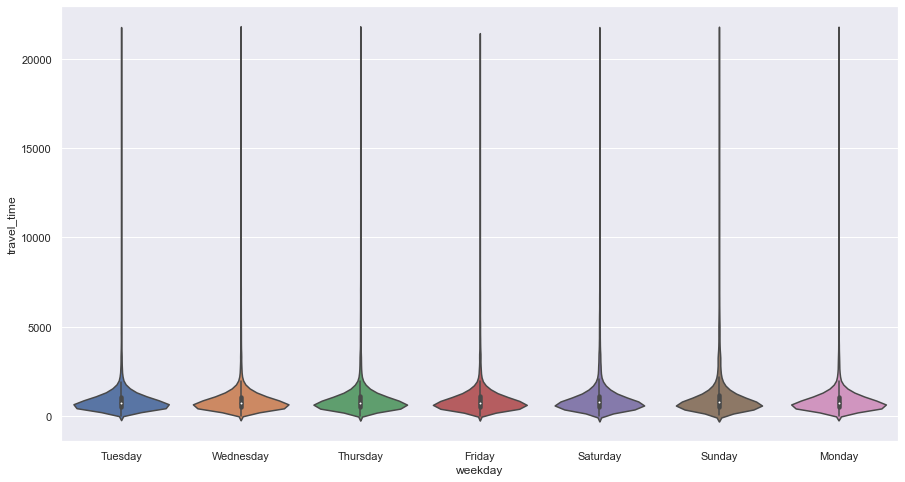

In [19]:
sns.violinplot(x=movements['weekday'], y = movements['travel_time'], data=movements)

<ipython-input-20-64e3a3188244>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


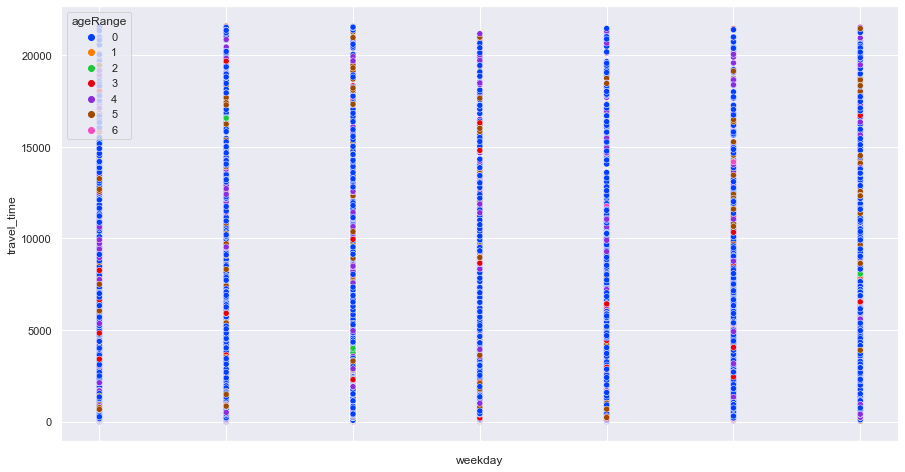

In [20]:
sns.set(rc = {'figure.figsize': (15,8)})
ax = sns.scatterplot(x='weekday', y = 'travel_time', data = movements, hue='ageRange', palette='bright');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [21]:
movements['travel_time'] = movements['travel_time'] / 60

<AxesSubplot:>

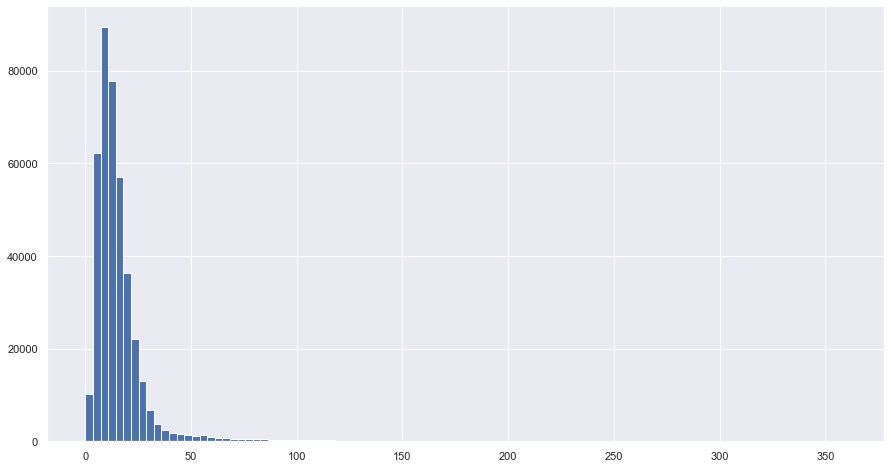

In [22]:
#Distribution of the rides by travel time (in minutes)
movements['travel_time'].hist(bins=100)

 We are going to remove the trips whose duration is less than 1 minute and more than 4 hours, considering that these trips are wrong in the table due to errors in the data collection.

In [23]:
movements = movements[(movements['travel_time']>=2) & (movements['travel_time'] < 240)]

<AxesSubplot:>

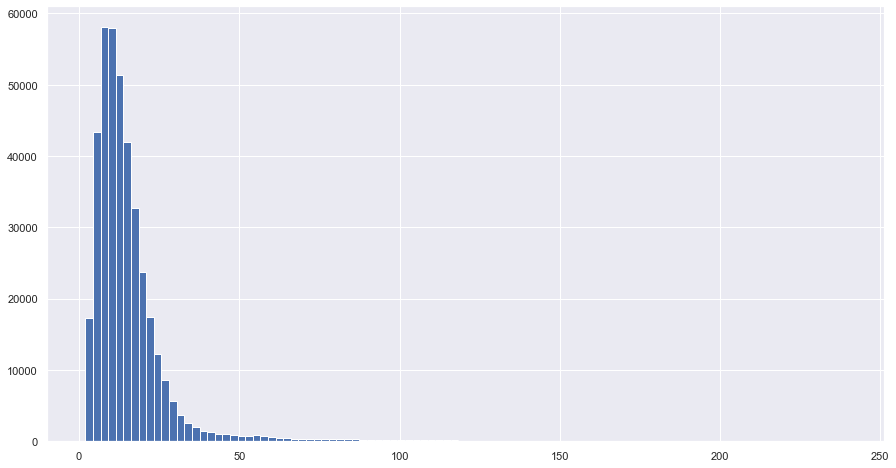

In [24]:
movements['travel_time'].hist(bins=100)

#### Analyzing data by age of the user

In [25]:
age_Range_dic = {0: 'not defined', 1: '0 - 16 years', 2: '17 - 18 years', 
             3: '19 - 26 years',4: '27 - 40 years', 5: '41 - 65 years',
             6: ' more 65 years'}

age_Range = pd.DataFrame([[key, age_Range_dic[key]] for key in age_Range_dic.keys()], columns = ['id', 'range'])
age_Range

,id,range
0,0,not defined
1,1,0 - 16 years
2,2,17 - 18 years
3,3,19 - 26 years
4,4,27 - 40 years
5,5,41 - 65 years
6,6,more 65 years


In [26]:
rides_per_age=movements.groupby('ageRange')['user_type'].count().reset_index()
rides_per_age=rides_per_age.merge(age_Range, how='inner', left_on='ageRange', right_on='id')

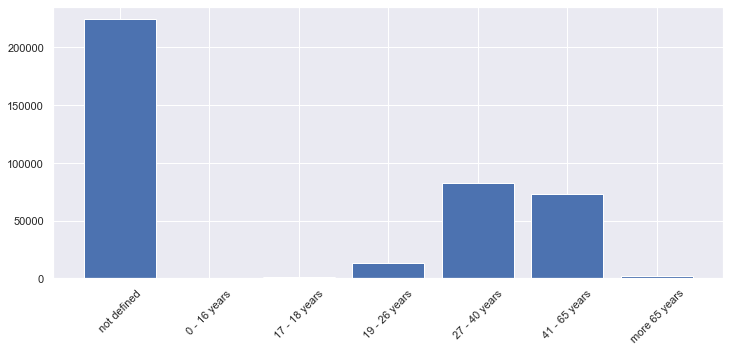

In [27]:
plt.figure(figsize=(12,5))
plt.bar(rides_per_age['range'], height = rides_per_age['user_type']);
plt.xticks(rotation=45);

We observate that in most of the data the age range is not defined, we are not going to eliminate these rows, so we could loss a lot of information

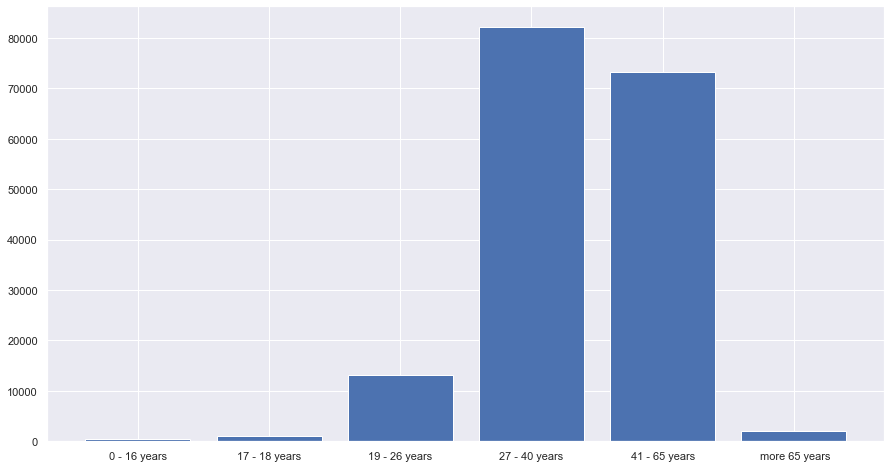

In [28]:
rides_per_age = rides_per_age[rides_per_age['ageRange']!= 0]
plt.bar(rides_per_age['range'], height = rides_per_age['user_type']);


#### 1.1.2. Stations data

In the document 202106 we have information about the situation of the stations per day and hour, this file contains the following columns:

**id**: code of the base station

**latitude**: latitude of the station in WGS84 format

**longitude**: lenght of the station in WGS84 format

**name**: name of the station

**light**: ocupation of the station:

    - 0: low
    - 1: medium
    - 2: high
    - 3: inactive

**number**: logical designation of the Base Station

**activate**: active station
    - 0: not active
    - 1: active
    
**no_available**: station availability
    - 0: available
    - 1: unavailable

**total_bases**: number of bases of the station

**dock_bikes**: number of docked bicycles

**free_bases**: number of free bases

**reservations_count**: number of active reservations


We are going to use this data to get the name and coordinates of the stations

In [29]:
stations = pd.read_json('202106.json', lines=True)
stations.head()

,_id,stations
0,2021-06-01T00:43:39.688214,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
1,2021-06-01T01:43:41.872092,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
2,2021-06-01T02:43:42.969250,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
3,2021-06-01T03:43:44.600717,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
4,2021-06-01T04:43:45.629938,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."


We want to know the number of total bases available in each stations and the information about the latitude and longitude of them, so we can consider only the first row of the file, because the information we are looking for not depend of the hour and day

In [30]:
stations = stations['stations'][0]
stations = pd.DataFrame(stations)

In [31]:
stations.head()

,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,id
0,1,Puerta del Sol A,0,0,30,26,1a,-3.7018341,0,Puerta del Sol nº 1,40.4172137,3,1
1,1,Puerta del Sol B,0,0,30,28,1b,-3.701602938060457,0,Puerta del Sol nº 1,40.41731271011562,2,2
2,1,Miguel Moya,0,0,24,20,2,-3.7058415,0,Calle Miguel Moya nº 1,40.4205886,1,3
3,1,Plaza Conde Suchil,0,1,18,2,3,-3.7069171,0,Plaza del Conde del Valle de Súchil nº 3,40.4302937,12,4
4,1,Malasaña,0,2,24,15,4,-3.7025875,0,Calle Manuela Malasaña nº 5,40.4285524,7,5


In [32]:
stations = stations[['name', 'longitude', 'latitude', 'address', 'total_bases', 'id']]

##### Number of stations and location

There are 264 stations of bicimad, we are going to use the library folium to plot the locations on a map

In [33]:
stations.describe()

,total_bases,id
count,264.000000,264.000000
mean,23.920455,136.829545
std,1.877756,77.475946
min,12.000000,1.000000
25%,24.000000,71.750000
50%,24.000000,137.500000
75%,24.000000,203.250000
max,30.000000,270.000000


In [34]:
#!pip install folium
import folium

In [35]:
stations['longitude'] = stations['longitude'].astype('float')
stations['latitude'] = stations['latitude'].astype('float')

In [36]:
#we create a map with the location of interest (Madrid)
bike_stations = folium.Map(location=[stations.latitude.mean(), 
                           stations.longitude.mean()],
                 zoom_start=14, control_scale=True)

In [37]:
for index, location_info in stations.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], 
                  popup=location_info["name"]).add_to(bike_stations)

In [38]:
bike_stations

##### Number of rides per station (origin station)

In [39]:
rides_origin = movements.merge(stations, how='inner', left_on='idunplug_station', right_on='id')

In [40]:
rides_origin = rides_origin.groupby('id')['_id'].count()

In [41]:
rides_origin = rides_origin.reset_index()

In [42]:
rides_origin = rides_origin.merge(stations, how = 'inner', right_on= 'id', left_on='id')

In [43]:
rides_origin

,id,_id,name,longitude,latitude,address,total_bases
0,1,1849,Puerta del Sol A,-3.701834,40.417214,Puerta del Sol nº 1,30
1,2,859,Puerta del Sol B,-3.701603,40.417313,Puerta del Sol nº 1,30
2,3,1662,Miguel Moya,-3.705842,40.420589,Calle Miguel Moya nº 1,24
3,4,1549,Plaza Conde Suchil,-3.706917,40.430294,Plaza del Conde del Valle de Súchil nº 3,18
4,5,1073,Malasaña,-3.702587,40.428552,Calle Manuela Malasaña nº 5,24
...,...,...,...,...,...,...,...
257,266,189,Ciudad Universitaria 1,-3.726990,40.443750,Avenida de la Complutense (Metro Ciudad Univer...,24
258,267,401,Ciudad Universitaria 2,-3.726930,40.443420,Avenida de la Complutense (Metro Ciudad Univer...,24
259,268,694,Facultad Biología,-3.727310,40.449120,Calle José Antonio Novais frente al nº 12,24
260,269,583,Facultad Derecho,-3.729370,40.451090,Avenida Complutense nº 23,24


In [44]:
#Now we have a dataframe with the number of rides per station, we can evaluate which stations have the most rides

In [45]:
rides_origin = rides_origin.sort_values(by='_id', ascending=False)

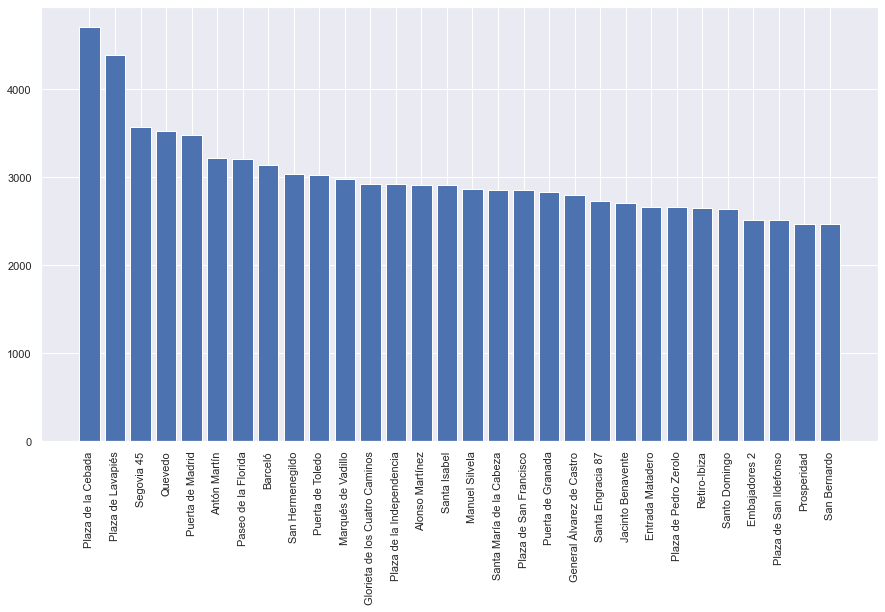

In [46]:
#plot: 30 stations with the most
rides_origin = rides_origin.head(30)
plt.figure(figsize=(15,8))
plt.bar(rides_origin['name'], height = rides_origin['_id']);
plt.xticks(rotation=90);

##### Number of rides per station (destination station)

In [47]:
rides_destination = movements.merge(stations, how='inner', left_on='idplug_station', right_on='id')

In [48]:
rides_destination = rides_destination.groupby('id')['_id'].count()
rides_destination = rides_destination.reset_index()
rides_destination = rides_destination.merge(stations, how = 'inner', right_on= 'id', left_on='id')
rides_destination = rides_destination.sort_values(by='_id', ascending=False)

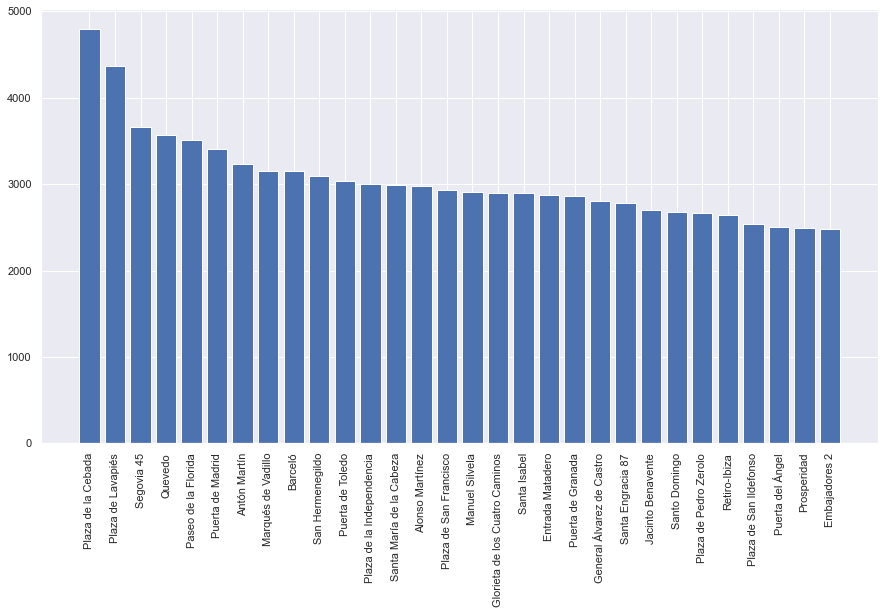

In [49]:
#plot: 30 stations with the most
rides_destination = rides_destination.head(30)
plt.figure(figsize=(15,8))
plt.bar(rides_destination['name'], height = rides_destination['_id']);
plt.xticks(rotation=90);

Comparing both charts, we can see that the most popular stations for picking a bike are the same that those for leaving the bike

#### 1.1.3.Adding useful information to the dataframe

We are going to add useful information for the predictive models. One of the important is the type of day (holiday, working day, weekend).

We use a dataframe obtained from the open data portal of the community of madrid.

In [66]:
pd.read_csv?

In [126]:
holidays_df = pd.read_csv('calendario.csv', sep=';', names=(['day', 'day_week', 'holiday', 'type', 'festivity']))

In [127]:
#We are only interested in knowing the holidays
holidays_df = holidays_df[holidays_df['holiday']=='festivo']

In [128]:
pd.to_datetime?

In [129]:
holidays_df['date'] = pd.to_datetime(holidays_df['day'], dayfirst=True)
holidays_df


,day,day_week,holiday,type,festivity,date
1,01/01/2013,martes,festivo,Festivo nacional,Año Nuevo,2013-01-01
7,07/01/2013,lunes,festivo,Festivo nacional,Traslado Epifanía del Señor,2013-01-07
77,18/03/2013,lunes,festivo,Festivo de la Comunidad de Madrid,Traslado San Jose,2013-03-18
87,28/03/2013,jueves,festivo,Festivo de la comunidad de Madrid,Jueves Santo,2013-03-28
88,29/03/2013,viernes,festivo,Festivo nacional,Viernes Santo,2013-03-29
...,...,...,...,...,...,...
2549,25/12/2019,miércoles,festivo,Festivo nacional,Natividad del Señor,2019-12-25
2556,01/01/2020,miércoles,festivo,Festivo nacional,Año Nuevo,2020-01-01
2561,06/01/2020,lunes,festivo,Festivo nacional,Epifanía del Señor,2020-01-06
2922,01/01/2021,viernes,festivo,Festivo nacional,Año Nuevo,2021-01-01


In [130]:
movements['date'] = movements.date.astype('datetime64[ns]')


<ipython-input-130-21e13ecba8bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movements['date'] = movements.date.astype('datetime64[ns]')


In [131]:
holidays_df['date']=holidays_df.date.astype('datetime64[ns]')


In [135]:
movements_final = movements.merge(holidays_df, how='left', on= 'date')

In [136]:
movements_final

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,...,datetime,date,weekday,hour,month,day,day_week,holiday,type,festivity
0,{'$oid': '60bbf3f21b91311d90d568ad'},b67ea824acf706087d5818ebc6f90821a5abaab17a0868...,15,1,13,5.316667,38,0,54,2021-06-01T00:00:00Z,...,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0,6,NaN,NaN,NaN,NaN,NaN
1,{'$oid': '60bbf3f21b91311d90d568b2'},364b1b99f1f9a1748f7abf1134c8d6a46197b583649308...,7,1,1,6.433333,185,0,126,2021-06-01T00:00:00Z,...,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0,6,NaN,NaN,NaN,NaN,NaN
2,{'$oid': '60bbf3f21b91311d90d568b3'},5cc17031cba02835dda4b6c153b56572beaade54d8ab91...,14,1,10,7.750000,15,0,91,2021-06-01T00:00:00Z,...,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0,6,NaN,NaN,NaN,NaN,NaN
3,{'$oid': '60bbf3f21b91311d90d568b4'},6e855acaaa17d6d14236598c0f1172c783e16950e39c01...,8,1,22,10.216667,84,0,236,2021-06-01T00:00:00Z,...,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0,6,NaN,NaN,NaN,NaN,NaN
4,{'$oid': '60bbf3f21b91311d90d568b5'},e93417502d55208995a61f4177956ab9289aba39044ce3...,1,1,4,12.516667,131,5,94,2021-06-01T00:00:00Z,...,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0,6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396251,{'$oid': '60e3812c1b9131285030f696'},36d40b49fafe4e7f41919089b609debf52f1ee42f3e752...,14,1,20,14.016667,132,5,265,2021-06-30T23:00:00Z,...,2021-06-30 23:00:00+00:00,2021-06-30,Wednesday,23,6,NaN,NaN,NaN,NaN,NaN
396252,{'$oid': '60e381341b9131285030fefb'},04ea09adba4c3e5e9e9142362b0fca2187530f31834001...,23,1,9,24.666667,182,5,265,2021-06-30T21:00:00Z,...,2021-06-30 21:00:00+00:00,2021-06-30,Wednesday,21,6,NaN,NaN,NaN,NaN,NaN
396253,{'$oid': '60e381351b9131285030ff15'},d26c47762f73fbdca3fefb34830f72f2df1538f9926c73...,22,1,3,12.700000,15,5,265,2021-06-29T18:00:00Z,...,2021-06-29 18:00:00+00:00,2021-06-29,Tuesday,18,6,NaN,NaN,NaN,NaN,NaN
396254,{'$oid': '60e4d2a51b91313ed4f52e62'},45de608bddfda3f468ef6093c65f6246a2917ce2376e98...,23,1,3,12.433333,234,0,84,2021-06-27T19:00:00Z,...,2021-06-27 19:00:00+00:00,2021-06-27,Sunday,19,6,NaN,NaN,NaN,NaN,NaN


In [137]:
movements_final.to_csv('movements_df.csv')